# direct tests on Game Engine
(not going thourght FastAPI server)

In [8]:
import os, glob
import random
from player import Player
from game_engine import Altered_game_engine as altered_ge
from statemachine.contrib.diagram import DotGraphMachine
from IPython.display import Image

In [9]:
altered = altered_ge()
graph = DotGraphMachine(altered)  # also accepts instances
GRAPHVIZ_EXE_PATH = r'C:\softs\Graphviz12.1.2\bin\dot.exe'

def plot_statemachine(graph, verbose=False):
    dot = graph()
    if verbose:
        dot.to_string()
    dot.write_png('test.png', prog=GRAPHVIZ_EXE_PATH)
    return Image(filename='test.png')

In [10]:
n_cards = 10

# remove all json files in the folder games
files = glob.glob('games/*.json')
for f in files:
    os.remove(f)

In [11]:
p1 = Player(name="p1", deck=[f'c{str(i).zfill(2)}' for i in random.sample(range(1, 100), n_cards)], is_AI=True)
p2 = Player(name="p2", deck=[f'c{str(i).zfill(2)}' for i in random.sample(range(1, 100), n_cards)], is_AI=True)
p1 = altered.create_a_new_game(p1)
p1

Player(name='p1', deck=['c52', 'c75', 'c20', 'c97', 'c22', 'c17', 'c83', 'c43', 'c21', 'c04'], game_id='Js3Be9SCZAuzAThDJuDqmD_20241016T170556', id=1, hand=[], reserve=[], landmarks=[], exp_hero=[], exp_companion=[], mana_pile=[], discard_pile=[], has_passed_afternoon=False, turn_not_ended=False, pending_effects=None, actions=None, available_actions=None, server='http://127.0.0.1:8000', is_AI=True, AI_level='random')

In [5]:
p2.game_id = p1.game_id
p2 = altered.join_a_game(p2)
p2

Player(name='p2', deck=['c31', 'c84', 'c75', 'c49', 'c27', 'c92', 'c94', 'c80', 'c79', 'c98'], game_id='hkYkwSDq7rRdKG9NZZJ8UC_20241016T163748', id=2, hand=[], reserve=[], landmarks=[], exp_hero=[], exp_companion=[], mana_pile=[], discard_pile=[], has_passed_afternoon=False, turn_not_ended=False, pending_effects=None, actions=None, available_actions=None, server='http://127.0.0.1:8000', is_AI=True, AI_level='random')

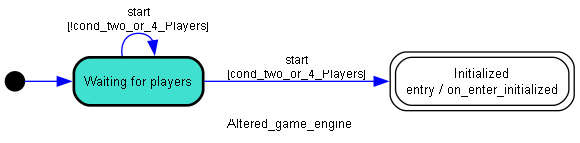

In [6]:
plot_statemachine(graph)

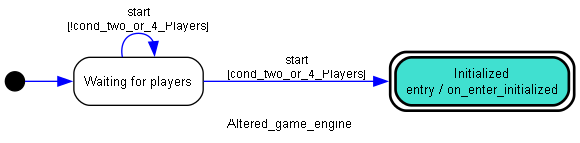

In [7]:
altered.start()
plot_statemachine(graph)